<a href="https://colab.research.google.com/github/arissaharada/DIO_BairesDev_Machine_Learning/blob/main/DIO_M%C3%A9tricas_Avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo de Métricas de Avaliação de Aprendizado **

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score. Para que seja possível implementar estas funções, você deve utilizar os métodos e suas fórmulas correspondentes (Tabela 1).

Para a leitura dos valores de VP, VN, FP e FN, será necessário escolher uma matriz de confusão para a base dos cálculos. Essa matriz você pode escolher de forma arbitraria, pois nosso objetivo é entender como funciona cada métrica.  



Tabela 1: Visão geral das métricas usadas para avaliar métodos de classificação. VP: verdadeiros positivos; FN: falsos negativos; FP: falsos positivos; VN: verdadeiros negativos; P: precisão; S: sensibilidade; N: total de elementos.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8994 - loss: 0.3160 - val_accuracy: 0.9847 - val_loss: 0.0449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9841 - loss: 0.0498 - val_accuracy: 0.9867 - val_loss: 0.0425
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9903 - loss: 0.0328 - val_accuracy: 0.9903 - val_loss: 0.0273
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9914 - loss: 0.0254 - val_accuracy: 0.9901 - val_loss: 0.0290
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9913 - val_loss: 0.0274
313/313 - 3s - 11ms/step - accuracy: 0.9913 - loss: 0.0274

Acurácia no teste: 0.9913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


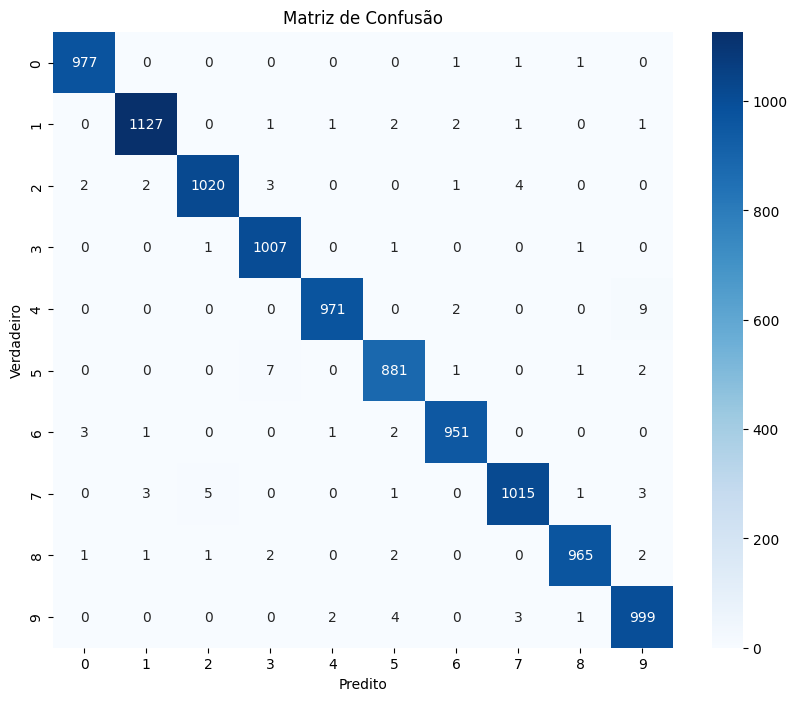

Relatório de Classificação:

              precision    recall  f1-score   support

           0     0.9939    0.9969    0.9954       980
           1     0.9938    0.9930    0.9934      1135
           2     0.9932    0.9884    0.9908      1032
           3     0.9873    0.9970    0.9921      1010
           4     0.9959    0.9888    0.9923       982
           5     0.9866    0.9877    0.9871       892
           6     0.9927    0.9927    0.9927       958
           7     0.9912    0.9874    0.9893      1028
           8     0.9948    0.9908    0.9928       974
           9     0.9833    0.9901    0.9867      1009

    accuracy                         0.9913     10000
   macro avg     0.9913    0.9913    0.9913     10000
weighted avg     0.9913    0.9913    0.9913     10000



In [1]:
# Instalação do TensorFlow (versão recomendada, estável)
# !pip install -q tensorflow

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Carregar os dados MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Pré-processamento dos dados
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definição do modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Callback do TensorBoard (opcional)
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinamento do modelo
model.fit(
    x=train_images,
    y=train_labels,
    epochs=5,
    validation_data=(test_images, test_labels),
    callbacks=[tensorboard_callback]
)

# Avaliação do modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nAcurácia no teste: {test_acc:.4f}")

# Predições
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Matriz de confusão
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# Relatório com precisão, recall, F1-score
report = classification_report(test_labels, y_pred, digits=4)
print("Relatório de Classificação:\n")
print(report)


In [2]:
# Exemplo para a classe '0' (ajuste para outras classes se quiser)
VP = cm[0, 0]
FN = np.sum(cm[0, :]) - VP
FP = np.sum(cm[:, 0]) - VP
VN = np.sum(cm) - (VP + FN + FP)

# Cálculos
sensibilidade = VP / (VP + FN)
especificidade = VN / (VN + FP)
precisao = VP / (VP + FP)
f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
acuracia = (VP + VN) / np.sum(cm)

print(f"Sensibilidade: {sensibilidade:.4f}")
print(f"Especificidade: {especificidade:.4f}")
print(f"Precisão: {precisao:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"Acurácia: {acuracia:.4f}")


Sensibilidade: 0.9969
Especificidade: 0.9993
Precisão: 0.9939
F1-Score: 0.9954
Acurácia: 0.9991
